In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline 

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller, kpss
import os
import sys
import json
import requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
Data variables:
    thetao   (time) float32 ...

In [4]:
rcParams['figure.figsize'] = 18, 8


### from XARRAY to PANDAS conversion

<ul>
<li>Data list(datasets) by variable thetao in coords depth and time</li>
<li>Datasets to dataframe in time series indexed in time</li>
</ul>

In [5]:
df = ds.to_dataframe()
#df.head()

In [6]:
#df.thetao.plot();
print("Mean Values in the Distribution")
print(df.mean())

Mean Values in the Distribution
depth      1.018295
thetao    19.239149
dtype: float32


In [7]:
print(df.std())

depth     0.000058
thetao    4.578274
dtype: float32


In [8]:
print(df.skew())


depth     0.000000
thetao    0.277442
dtype: float32


In [9]:

df = ds.to_dataframe().reset_index().set_index('time')
#df.head()

In [10]:
test_result=adfuller(df['thetao'])
test_result

(-15.551349502568595,
 2.0980770496472286e-28,
 40,
 12012,
 {'1%': -3.4308945136518822,
  '5%': -2.8617806470827802,
  '10%': -2.566898091396061},
 -18974.941558574184)

In [11]:
def adfuller_test(temperature):
    result=adfuller(df['thetao'])
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

adfuller_test(df['thetao'])

ADF Test Statistic : -15.551349502568595
p-value : 2.0980770496472286e-28
#Lags Used : 40
Number of Observations : 12012
Data is stationary


<ul>
<li>Group by winter season: DJF</li>
<li>Conversion to dataframe</li>
</ul>

In [14]:
ds1_season_inv = ds['thetao'].groupby('time.season')['DJF']



In [15]:
df1_season_inv = ds1_season_inv.to_dataframe()
#print(df1_season_inv)

In [22]:
print("Mean Values in the Distribution")
print(df1_season_inv.mean())

Mean Values in the Distribution
depth      1.018247
thetao    14.879517
dtype: float32


<ul>
<li>Group by summer season: JJA</li>
<li>Conversion to dataframe</li>
</ul>

In [16]:
df1_season_est = ds['thetao'].groupby('time.season')['JJA']


In [17]:
df1_season_est = df1_season_est.to_dataframe()


In [18]:
print("Mean Values in the Distribution")
print(df1_season_est.mean())

Mean Values in the Distribution
depth      1.018249
thetao    24.639858
dtype: float32


<ul>
<li>Group by spring season: MAM</li>
<li>Conversion to dataframe</li>
</ul>

In [19]:
df1_season_prim = ds['thetao'].groupby('time.season')['MAM']


In [20]:
df1_season_prim = df1_season_prim.to_dataframe()


In [21]:
print("Mean Values in the Distribution")
print(df1_season_prim.mean())

Mean Values in the Distribution
depth      1.018249
thetao    15.712626
dtype: float32


<ul>
<li>Group by autumn season: SON</li>
<li>Conversion to dataframe</li>
</ul>

In [22]:
df1_season_aut = ds['thetao'].groupby('time.season')['SON']


In [23]:
df1_season_aut = df1_season_aut.to_dataframe()
#df1_season_aut

In [24]:
print("Mean Values in the Distribution")
print(df1_season_aut.mean())

Mean Values in the Distribution
depth      1.018248
thetao    21.667620
dtype: float32


In [25]:

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse 
import matplotlib as mpl


In [26]:
fyy_dt_inv = df1_season_inv.groupby(pd.Grouper(freq='Y')).mean()
#fyy_dt_inv

In [27]:
fyy_dt_inv.shape

(33, 2)

In [28]:
fyy_dt_est = df1_season_est.groupby(pd.Grouper(freq='Y')).mean()
#fyy_dt_est

In [29]:
fyy_dt_prim = df1_season_prim.groupby(pd.Grouper(freq='Y')).mean()
#fyy_dt_prim

In [30]:
fyy_dt_aut = df1_season_aut.groupby(pd.Grouper(freq='Y')).mean()
#fyy_dt_aut

In [31]:
def adfuller_test(temperature):
    result=adfuller(fyy_dt_aut.thetao)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

adfuller_test(fyy_dt_aut.thetao)






ADF Test Statistic : -3.146045159848267
p-value : 0.02332803718801884
#Lags Used : 0
Number of Observations : 32
Data is stationary


In [32]:
def adfuller_test(temperature):
    result=adfuller(fyy_dt_prim.thetao)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

adfuller_test(fyy_dt_prim.thetao)

ADF Test Statistic : -4.004735947681693
p-value : 0.0013859144624094513
#Lags Used : 0
Number of Observations : 32
Data is stationary


In [33]:
def adfuller_test(temperature):
    result=adfuller(fyy_dt_est.thetao)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

adfuller_test(fyy_dt_est.thetao)

ADF Test Statistic : -3.7070154018012484
p-value : 0.004015551389421945
#Lags Used : 0
Number of Observations : 32
Data is stationary


In [34]:
def adfuller_test(temperature):
    result=adfuller(fyy_dt_inv.thetao)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

adfuller_test(fyy_dt_inv.thetao)

ADF Test Statistic : -2.5134611616618616
p-value : 0.11223333846897265
#Lags Used : 0
Number of Observations : 32
Data is non-stationary 


In [35]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame


                               SARIMAX Results                                
Dep. Variable:                 thetao   No. Observations:                   33
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  -5.203
Date:                Fri, 05 Nov 2021   AIC                             22.406
Time:                        13:46:57   BIC                             31.201
Sample:                    12-31-1987   HQIC                            25.322
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5075      0.290     -1.750      0.080      -1.076       0.061
ar.L2         -0.2689      0.276     -0.975      0.329      -0.809       0.271
ar.L3         -0.0974      0.153     -0.636      0.5

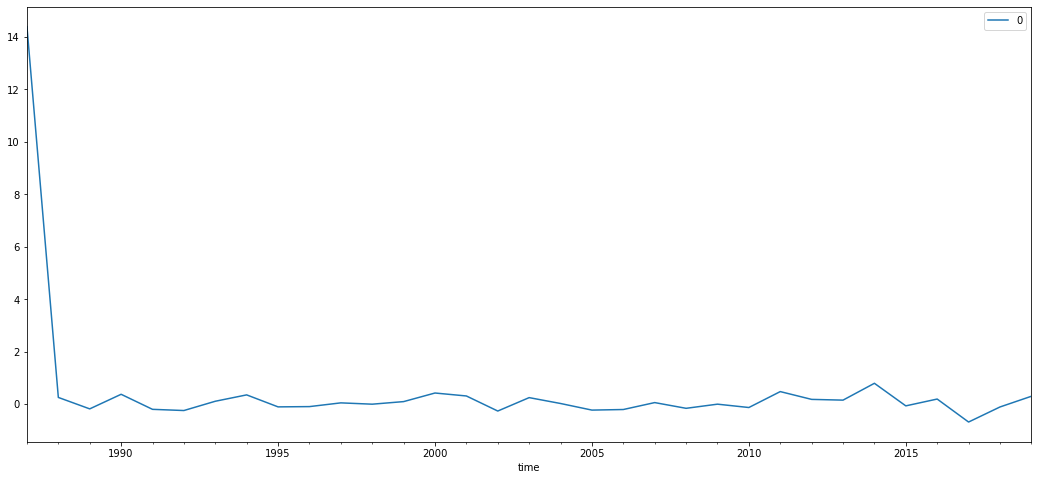

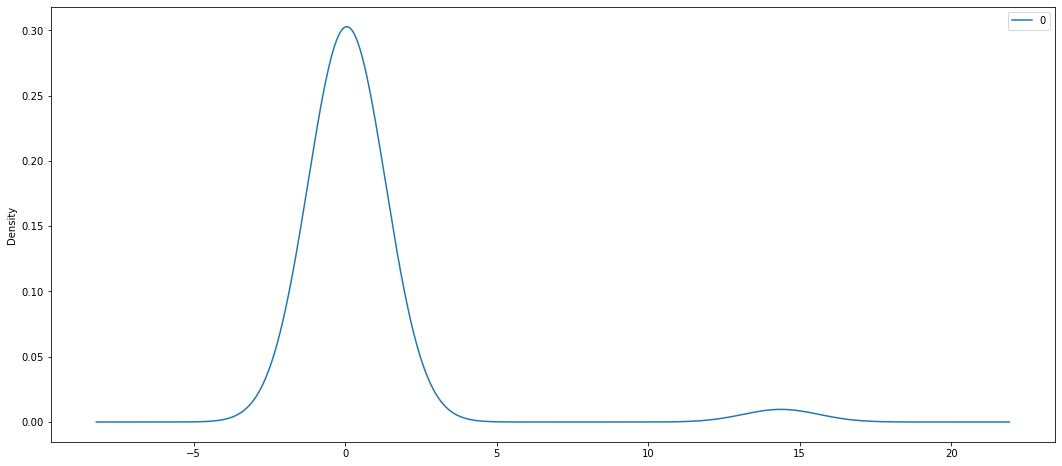

               0
count  33.000000
mean    0.491097
std     2.510034
min    -0.679541
25%    -0.126307
50%     0.050751
75%     0.257873
max    14.386896


In [36]:
model = ARIMA(fyy_dt_inv.thetao, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                 thetao   No. Observations:                   33
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -28.653
Date:                Fri, 05 Nov 2021   AIC                             69.305
Time:                        13:46:57   BIC                             78.100
Sample:                    12-31-1987   HQIC                            72.221
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8027      0.241     -3.325      0.001      -1.276      -0.330
ar.L2         -0.8185      0.367     -2.233      0.026      -1.537      -0.100
ar.L3         -0.5834      0.432     -1.351      0.1

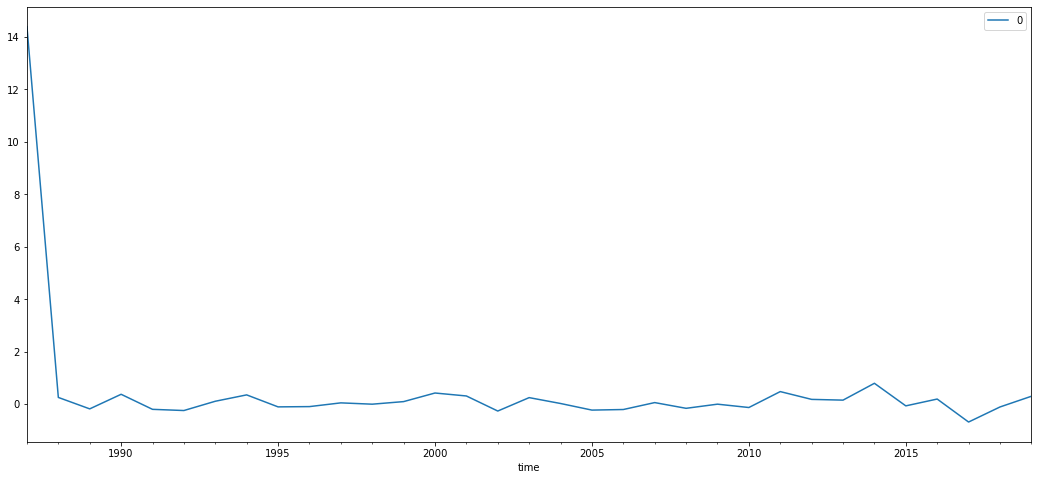

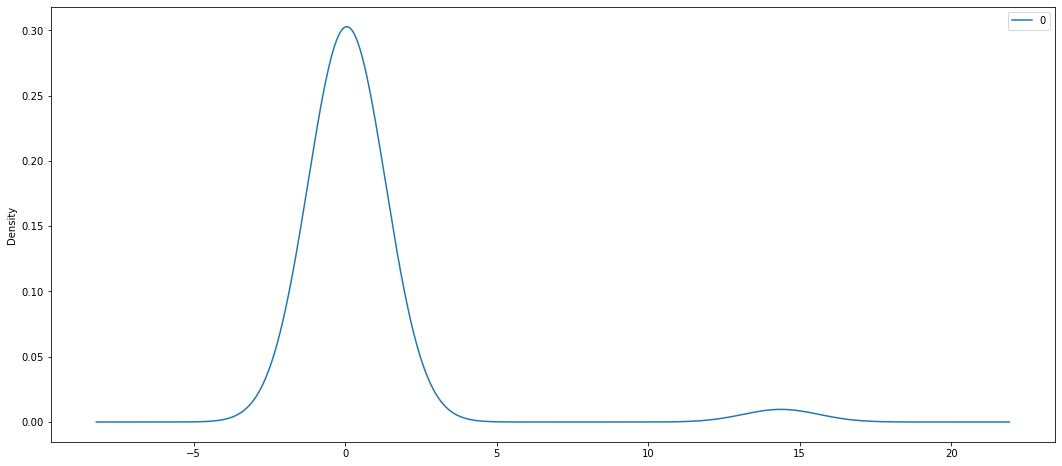

               0
count  33.000000
mean    0.491097
std     2.510034
min    -0.679541
25%    -0.126307
50%     0.050751
75%     0.257873
max    14.386896


In [37]:
model = ARIMA(fyy_dt_est.thetao, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                 thetao   No. Observations:                   33
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -14.856
Date:                Fri, 05 Nov 2021   AIC                             41.713
Time:                        13:46:58   BIC                             50.507
Sample:                    12-31-1987   HQIC                            44.628
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5066      0.206     -2.453      0.014      -0.911      -0.102
ar.L2         -0.3791      0.276     -1.375      0.169      -0.919       0.161
ar.L3         -0.5889      0.278     -2.121      0.0

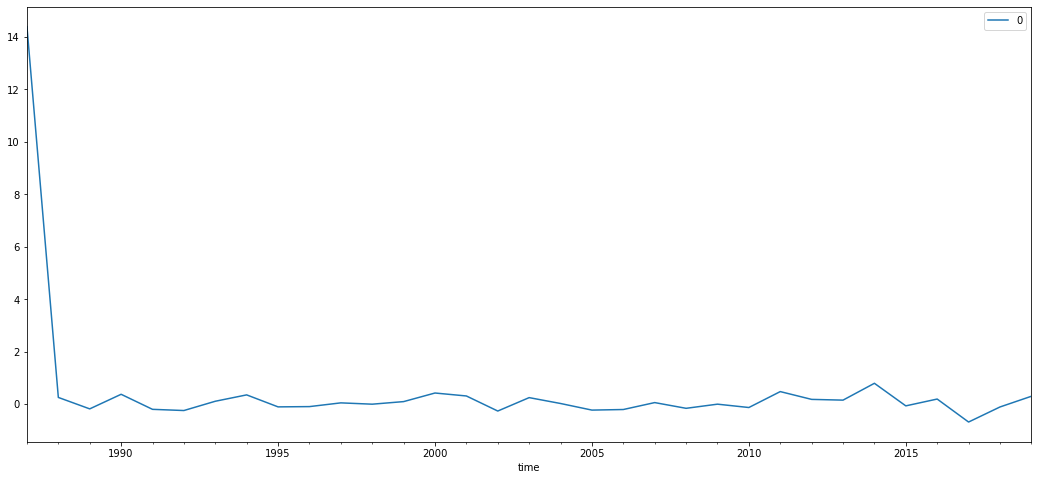

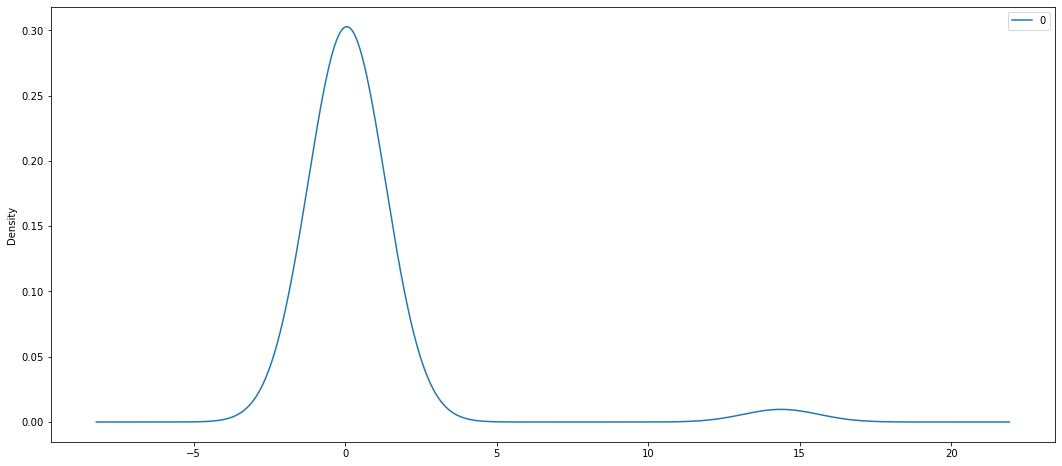

               0
count  33.000000
mean    0.491097
std     2.510034
min    -0.679541
25%    -0.126307
50%     0.050751
75%     0.257873
max    14.386896


In [38]:
model = ARIMA(fyy_dt_prim.thetao, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                 thetao   No. Observations:                   33
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -27.976
Date:                Fri, 05 Nov 2021   AIC                             67.953
Time:                        13:46:58   BIC                             76.747
Sample:                    12-31-1987   HQIC                            70.868
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4458      0.216     -2.062      0.039      -0.870      -0.022
ar.L2         -0.4845      0.274     -1.771      0.077      -1.021       0.052
ar.L3         -0.3219      0.349     -0.922      0.3

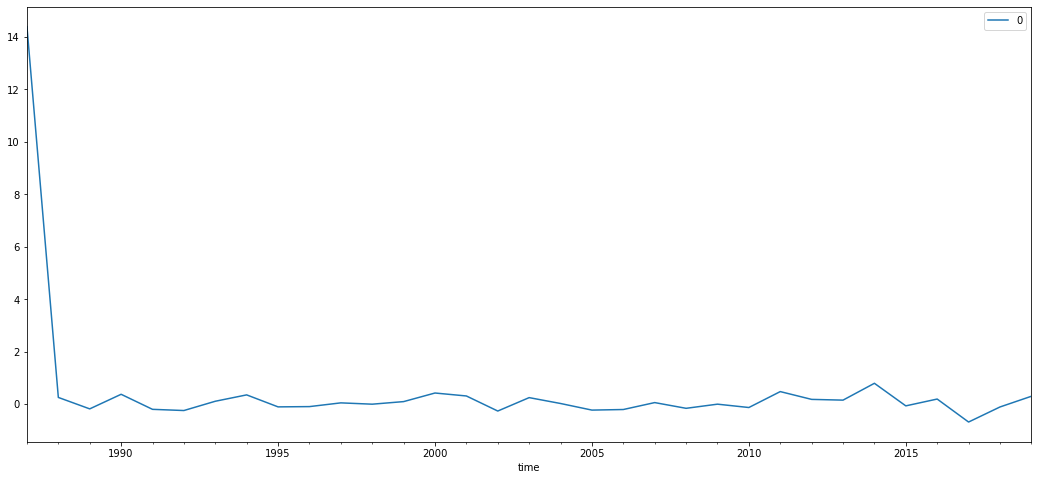

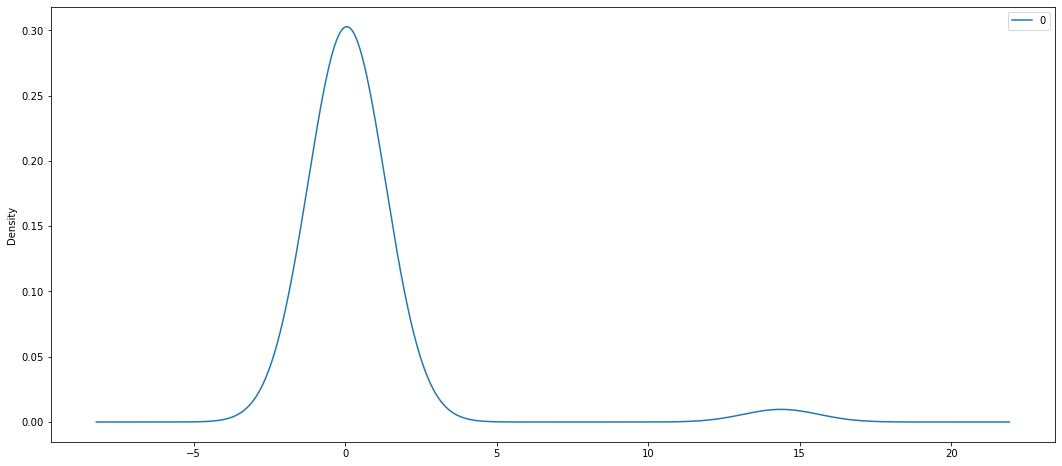

               0
count  33.000000
mean    0.491097
std     2.510034
min    -0.679541
25%    -0.126307
50%     0.050751
75%     0.257873
max    14.386896


In [39]:
model = ARIMA(fyy_dt_aut.thetao, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

predicted=14.871467, expected=14.668634
predicted=14.805789, expected=14.739790
predicted=14.776473, expected=14.646587
predicted=14.727711, expected=15.200816
predicted=14.919816, expected=15.087570
predicted=14.956770, expected=15.186717
predicted=15.050500, expected=15.899385
predicted=15.529793, expected=15.489791
predicted=15.548807, expected=15.639550
predicted=15.589960, expected=14.938803
predicted=15.283756, expected=15.209211
predicted=15.232443, expected=15.468254
Test RMSE: 0.363


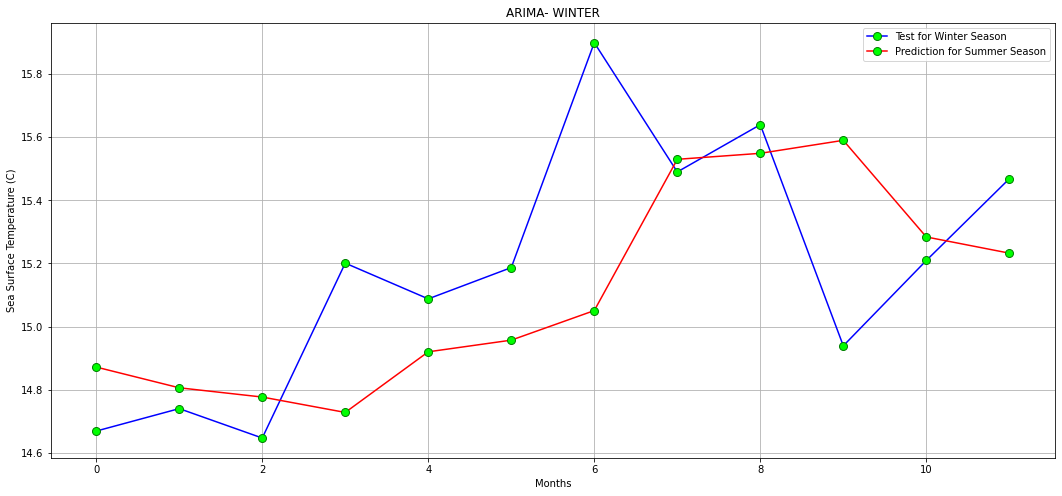

In [40]:
from math import sqrt
from sklearn.metrics import mean_squared_error

X = fyy_dt_inv.thetao.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test,color='b',label='Test for Winter Season',marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8)
plt.plot(predictions, color='red',label='Prediction for Summer Season',marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8)

plt.xlabel('Months')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('ARIMA- WINTER');
plt.legend();
plt.grid()

plt.show()



In [41]:
print(X)

[14.386896  14.644769  14.361849  14.82184   14.434675  14.315861
 14.513245  14.881816  14.494774  14.510351  14.640025  14.606548
 14.63746   15.0791235 15.167695  14.727791  15.139206  15.082706
 14.783767  14.681903  14.936582  14.668634  14.73979   14.646587
 15.200816  15.08757   15.186717  15.899385  15.489791  15.63955
 14.938803  15.209211  15.468254 ]


predicted=24.770402, expected=25.035048
predicted=24.978256, expected=24.967691
predicted=24.987916, expected=24.553873
predicted=24.677419, expected=24.757460
predicted=24.696089, expected=25.629992
predicted=25.379062, expected=24.653187
predicted=24.975852, expected=24.375761
predicted=24.457143, expected=25.881599
predicted=25.404099, expected=24.695610
predicted=25.141149, expected=25.464430
predicted=25.160374, expected=25.635923
predicted=25.571149, expected=25.605139
Test RMSE: 0.638


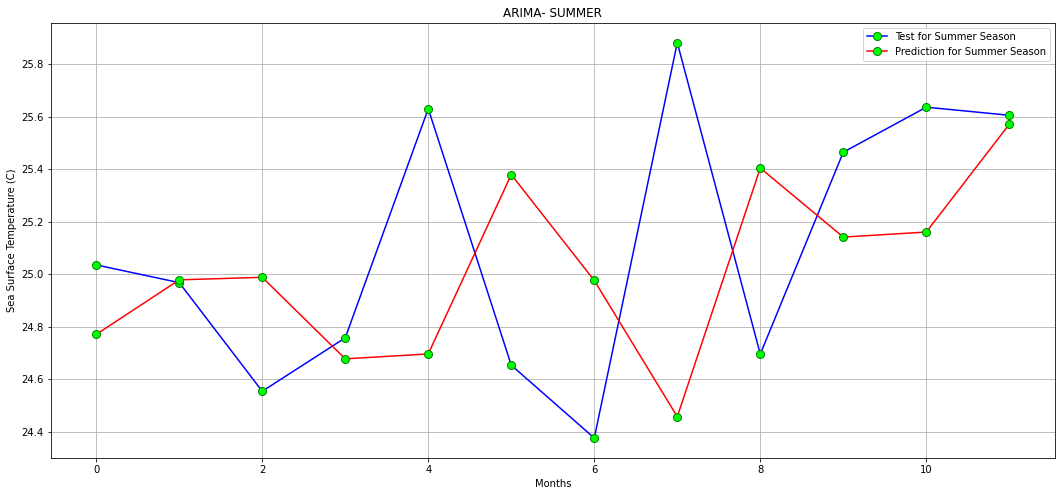

In [42]:
from math import sqrt
from sklearn.metrics import mean_squared_error

X = fyy_dt_est.thetao.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test,color='b',label='Test for Summer Season',marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8)
plt.plot(predictions, color='red',label='Prediction for Summer Season',marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8)

plt.xlabel('Months')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('ARIMA- SUMMER');
plt.legend();
plt.grid()

plt.show()

In [43]:
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 33
Training Observations: 21
Testing Observations: 12


Observations: 33
Training Observations: 21
Testing Observations: 12


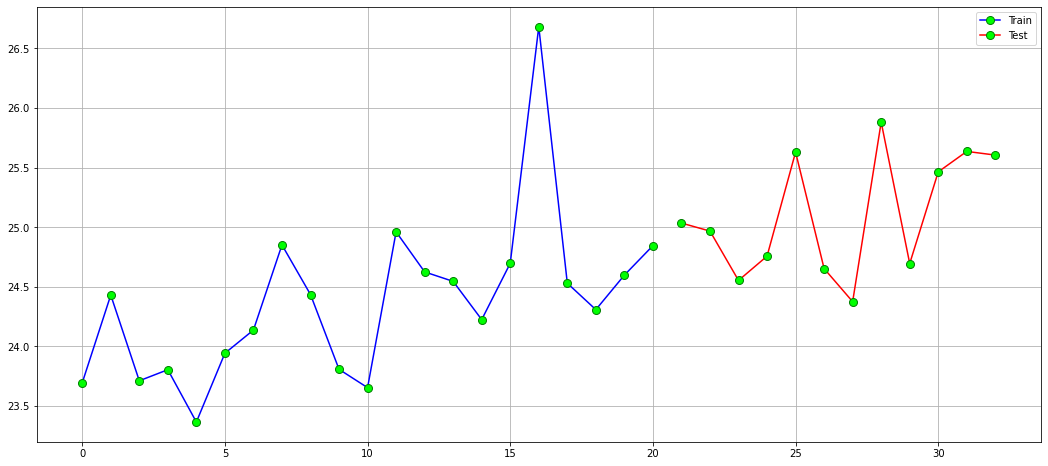

In [44]:
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
plt.plot(train,color='b',label='Train',marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8)
plt.plot([None for i in train] + [x for x in test],color='red',label='Test',marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8)
plt.legend()
plt.grid()

plt.show()


In [45]:
new_df_add = pd.concat([fyy_dt_aut.thetao,fyy_dt_inv.thetao,fyy_dt_prim.thetao,fyy_dt_est.thetao], axis=1)
new_df_add.columns = ['Mean_Autumn','Mean_Winter','Mean_Spring','Mean_Summer']
new_df_add.head()

,Mean_Autumn,Mean_Winter,Mean_Spring,Mean_Summer
time,,,,
1987-12-31,22.159573,14.386896,14.504118,23.694963
1988-12-31,21.266968,14.644769,15.430908,24.431070
1989-12-31,20.487349,14.361849,15.397736,23.712257
1990-12-31,21.502846,14.821840,15.964182,23.805128
1991-12-31,21.617373,14.434675,14.910305,23.366247


In [49]:
new_df_add.to_csv("TS_Seasonal_means_dash_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv", index=True, header=True)